#### Analyze training images features

In [1]:
import init_yaml
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# init Path
f_yaml = init_yaml.Init_yaml().config
feature_path = init_yaml.Init_yaml().path_join(f_yaml['feature_path'])
df = pd.read_csv(path.join(feature_path,'features.csv'))

In [15]:
df.head(5)

,name,coord_num,phi,pore.diameter,throat.diameter,euler
0,4385.npy,2.510288,0.261110,0.000011,0.000019,17
1,5887.npy,2.380952,0.227801,0.000011,0.000017,-6
2,15899.npy,2.601449,0.273600,0.000011,0.000017,5
3,14087.npy,2.146154,0.197042,0.000010,0.000017,36
4,9703.npy,2.225000,0.192166,0.000010,0.000016,14


#### Analyze features correlation

                 coord_num       phi  pore.diameter  throat.diameter     euler
coord_num         1.000000  0.811367       0.694157         0.364531 -0.716130
phi               0.811367  1.000000       0.666412         0.578461 -0.568829
pore.diameter     0.694157  0.666412       1.000000         0.631313 -0.346768
throat.diameter   0.364531  0.578461       0.631313         1.000000 -0.044801
euler            -0.716130 -0.568829      -0.346768        -0.044801  1.000000


[Text(0, -1.0, ''),
 Text(0, 0.0, 'coordination_num'),
 Text(0, 1.0, 'porosity'),
 Text(0, 2.0, 'pore.diameter'),
 Text(0, 3.0, 'throat.diameter'),
 Text(0, 4.0, 'Euler characteristics'),
 Text(0, 5.0, '')]

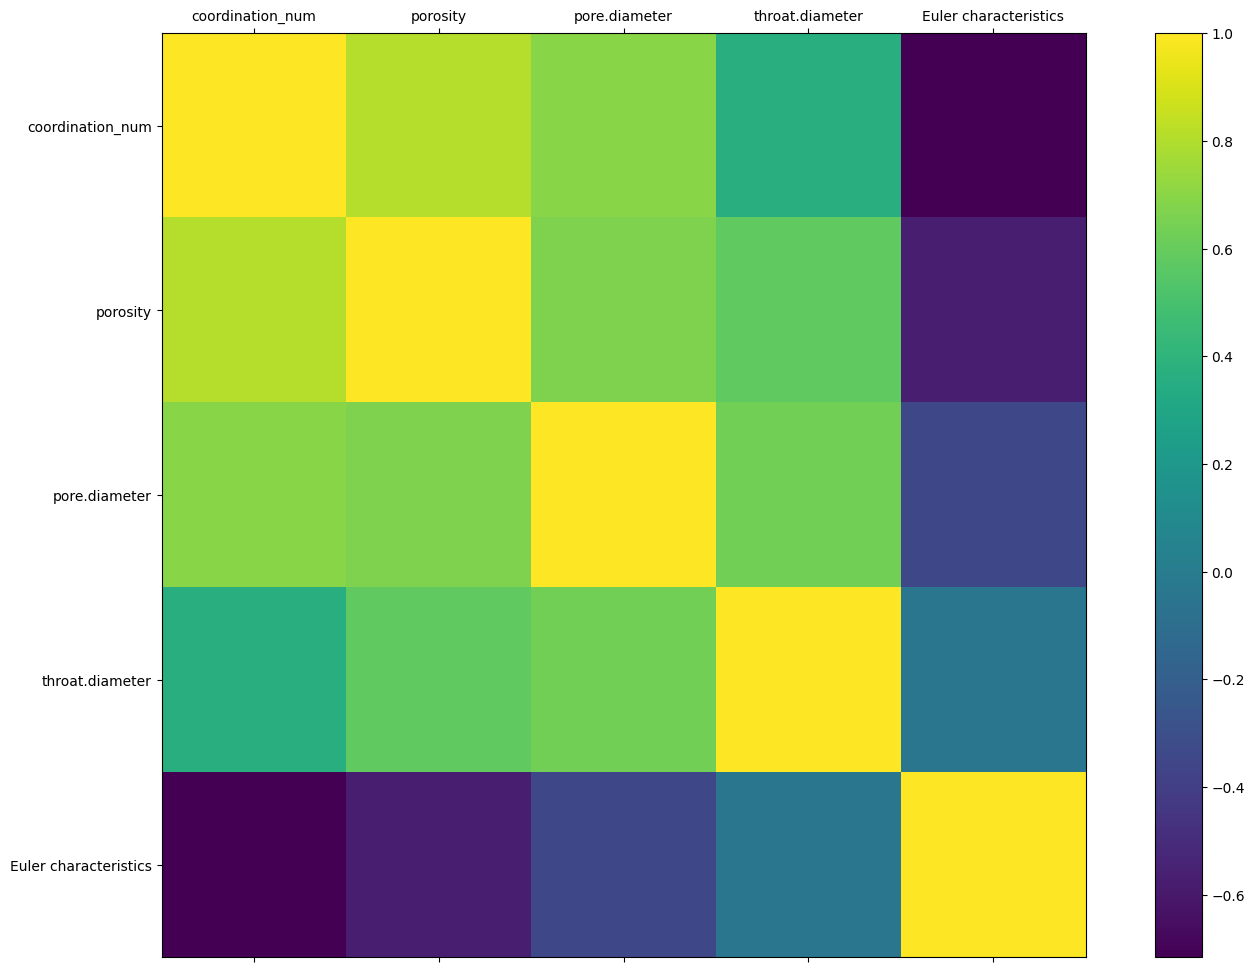

In [16]:
print(df.corr())

columns_list = [
    'coordination_num',
    'porosity',
    'pore.diameter',
    'throat.diameter',
    'Euler characteristics'
    ]

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr())
fig.colorbar(cax)
ax.set_xticklabels(['']+columns_list)
ax.set_yticklabels(['']+columns_list)

#### Coordination number statistics

In [17]:
df.coord_num.describe()

count    23837.000000
mean         2.404511
std          0.174570
min          1.674157
25%          2.292887
50%          2.408027
75%          2.520755
max          3.042017
Name: coord_num, dtype: float64

#### Porosity statistics

In [18]:
df.phi.describe()

count    23837.000000
mean         0.218320
std          0.033864
min          0.073875
25%          0.195591
50%          0.217060
75%          0.239957
max          0.347094
Name: phi, dtype: float64

#### PSD - mean pore diameter statistics

In [19]:
df['pore.diameter'].describe()

count    2.383700e+04
mean     1.031193e-05
std      5.251721e-07
min      8.343117e-06
25%      9.966264e-06
50%      1.030607e-05
75%      1.065565e-05
max      1.268936e-05
Name: pore.diameter, dtype: float64

#### TSD - mean throat size statistics

In [21]:
df['throat.diameter'].describe()

count    23837.000000
mean         0.000017
std          0.000001
min          0.000013
25%          0.000016
50%          0.000017
75%          0.000018
max          0.000023
Name: throat.diameter, dtype: float64

#### Euler characteristics statistics

In [20]:
df.euler.describe()

count    23837.000000
mean        10.703067
std         26.469798
min       -105.000000
25%         -6.000000
50%         11.000000
75%         28.000000
max        121.000000
Name: euler, dtype: float64